# M5 Series Exploration
In this notebook we explore the M5 dataset in order to identify which products to use in our experiments

In [1]:
import pandas as pd
import numpy as np
from datasetsforecast.m5 import M5

M5_DIRECTORY_PATH = "data"

### Loading the whole M5 dataset

In [2]:
Y_df, X_df, S_df = M5.load(M5_DIRECTORY_PATH, cache=False)
Y_df

,unique_id,ds,y
0,FOODS_1_001_CA_1,2011-01-29,3.0
1,FOODS_1_001_CA_1,2011-01-30,0.0
2,FOODS_1_001_CA_1,2011-01-31,0.0
3,FOODS_1_001_CA_1,2011-02-01,1.0
4,FOODS_1_001_CA_1,2011-02-02,4.0
...,...,...,...
47735392,HOUSEHOLD_2_516_WI_3,2016-06-15,0.0
47735393,HOUSEHOLD_2_516_WI_3,2016-06-16,1.0
47735394,HOUSEHOLD_2_516_WI_3,2016-06-17,0.0
47735395,HOUSEHOLD_2_516_WI_3,2016-06-18,0.0


### Filling the missing raws of the dataset with zeros

(this may take some time)

In [17]:
date_range = pd.date_range(Y_df.ds.min(),Y_df.ds.max())
unique_ids = Y_df.unique_id.unique()
extended_df = (
    Y_df.set_index(["unique_id","ds"])
    .reindex(pd.MultiIndex.from_product([unique_ids,date_range],names=["unique_id", "ds"]), fill_value=0.0)
    .reset_index()
)

In [27]:
extended_df

,unique_id,ds,y
0,FOODS_1_001_CA_1,2011-01-29,3.0
1,FOODS_1_001_CA_1,2011-01-30,0.0
2,FOODS_1_001_CA_1,2011-01-31,0.0
3,FOODS_1_001_CA_1,2011-02-01,1.0
4,FOODS_1_001_CA_1,2011-02-02,4.0
...,...,...,...
60034805,HOUSEHOLD_2_516_WI_3,2016-06-15,0.0
60034806,HOUSEHOLD_2_516_WI_3,2016-06-16,1.0
60034807,HOUSEHOLD_2_516_WI_3,2016-06-17,0.0
60034808,HOUSEHOLD_2_516_WI_3,2016-06-18,0.0


<AxesSubplot:>

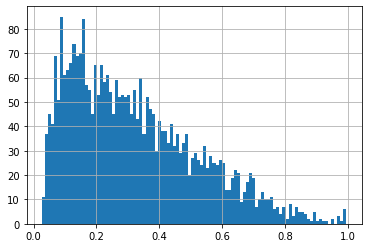

In [39]:
( extended_df
    .merge(S_df, on="unique_id")
    .groupby("item_id")
    ["y"]
    .aggregate(lambda x: (x>0).mean())
    .hist(bins=100)
)

In [45]:
top10_products = ( extended_df
    .merge(S_df, on="unique_id")
    .groupby("item_id")
    ["y"]
    .aggregate(lambda x: (x>0).mean())
    .sort_values()
    .loc[::-1]
    .head(10)
)
top10_products

item_id
FOODS_3_586    0.995531
FOODS_3_694    0.993448
FOODS_3_080    0.992788
FOODS_3_555    0.991874
FOODS_3_714    0.991468
FOODS_3_252    0.987405
FOODS_3_226    0.984561
FOODS_3_377    0.973997
FOODS_3_668    0.970747
FOODS_3_228    0.969731
Name: y, dtype: float64

In [49]:
top10_products.index

CategoricalIndex(['FOODS_3_586', 'FOODS_3_694', 'FOODS_3_080', 'FOODS_3_555',
                  'FOODS_3_714', 'FOODS_3_252', 'FOODS_3_226', 'FOODS_3_377',
                  'FOODS_3_668', 'FOODS_3_228'],
                 categories=['HOBBIES_1_001', 'HOBBIES_1_002', 'HOBBIES_1_003', 'HOBBIES_1_004', 'HOBBIES_1_005', 'HOBBIES_1_006', 'HOBBIES_1_007', 'HOBBIES_1_008', ...], ordered=False, dtype='category', name='item_id')

In [51]:
store_list = S_df.store_id.unique()
store_list

['CA_1', 'CA_2', 'CA_3', 'CA_4', 'TX_1', 'TX_2', 'TX_3', 'WI_1', 'WI_2', 'WI_3']
Categories (10, object): ['CA_1', 'CA_2', 'CA_3', 'CA_4', ..., 'TX_3', 'WI_1', 'WI_2', 'WI_3']

In [48]:
store_list = S_df.store_id.unique()
for store_id in store_list :
    for item_id in top10_products.index :
        print(item_id+"_"+store_id)

FOODS_3_586_CA_1
FOODS_3_694_CA_1
FOODS_3_080_CA_1
FOODS_3_555_CA_1
FOODS_3_714_CA_1
FOODS_3_252_CA_1
FOODS_3_226_CA_1
FOODS_3_377_CA_1
FOODS_3_668_CA_1
FOODS_3_228_CA_1
FOODS_3_586_CA_2
FOODS_3_694_CA_2
FOODS_3_080_CA_2
FOODS_3_555_CA_2
FOODS_3_714_CA_2
FOODS_3_252_CA_2
FOODS_3_226_CA_2
FOODS_3_377_CA_2
FOODS_3_668_CA_2
FOODS_3_228_CA_2
FOODS_3_586_CA_3
FOODS_3_694_CA_3
FOODS_3_080_CA_3
FOODS_3_555_CA_3
FOODS_3_714_CA_3
FOODS_3_252_CA_3
FOODS_3_226_CA_3
FOODS_3_377_CA_3
FOODS_3_668_CA_3
FOODS_3_228_CA_3
FOODS_3_586_CA_4
FOODS_3_694_CA_4
FOODS_3_080_CA_4
FOODS_3_555_CA_4
FOODS_3_714_CA_4
FOODS_3_252_CA_4
FOODS_3_226_CA_4
FOODS_3_377_CA_4
FOODS_3_668_CA_4
FOODS_3_228_CA_4
FOODS_3_586_TX_1
FOODS_3_694_TX_1
FOODS_3_080_TX_1
FOODS_3_555_TX_1
FOODS_3_714_TX_1
FOODS_3_252_TX_1
FOODS_3_226_TX_1
FOODS_3_377_TX_1
FOODS_3_668_TX_1
FOODS_3_228_TX_1
FOODS_3_586_TX_2
FOODS_3_694_TX_2
FOODS_3_080_TX_2
FOODS_3_555_TX_2
FOODS_3_714_TX_2
FOODS_3_252_TX_2
FOODS_3_226_TX_2
FOODS_3_377_TX_2
FOODS_3_668_TX

In [42]:
top10_products.index.values

['FOODS_3_586', 'FOODS_3_694', 'FOODS_3_080', 'FOODS_3_555', 'FOODS_3_714', 'FOODS_3_252', 'FOODS_3_226', 'FOODS_3_377', 'FOODS_3_668', 'FOODS_3_228']
Categories (3049, object): ['HOBBIES_1_001', 'HOBBIES_1_002', 'HOBBIES_1_003', 'HOBBIES_1_004', ..., 'FOODS_3_824', 'FOODS_3_825', 'FOODS_3_826', 'FOODS_3_827']

### Looking for products with low number of zero demands

Estimating the probability of non-zero demands $\mu$ and extracting the products with the higher values of $\mu$.

<AxesSubplot:xlabel='ds'>

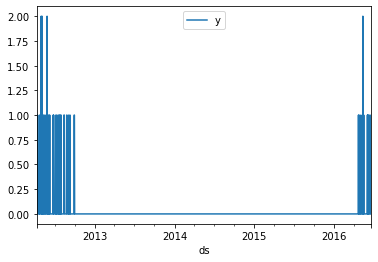

In [11]:
Y_df.loc[Y_df.unique_id == "FOODS_2_069_TX_3"].set_index("ds")[["y"]].plot()

In [10]:
mu_estimate = Y_df.groupby("unique_id")["y"].aggregate(lambda x: (x>0).mean()).sort_values()
mu_estimate = mu_estimate.loc[::-1]
mu_estimate.tail(45)

unique_id
FOODS_2_069_TX_3        0.028068
HOBBIES_2_055_CA_4      0.027901
HOBBIES_1_360_CA_4      0.027593
HOUSEHOLD_2_211_WI_2    0.027579
HOUSEHOLD_2_429_WI_2    0.026950
HOBBIES_1_212_TX_1      0.026626
HOUSEHOLD_2_202_WI_3    0.026504
HOBBIES_2_057_TX_1      0.026423
HOBBIES_1_006_CA_4      0.026384
HOBBIES_2_119_CA_4      0.026300
HOBBIES_2_030_CA_4      0.026178
HOUSEHOLD_2_147_CA_4    0.026123
HOUSEHOLD_2_014_WI_2    0.026087
HOUSEHOLD_2_412_WI_2    0.025915
HOBBIES_2_110_CA_4      0.025586
FOODS_1_079_TX_2        0.025458
HOUSEHOLD_2_134_TX_1    0.025407
HOUSEHOLD_2_147_WI_2    0.025394
HOUSEHOLD_2_202_WI_2    0.024969
HOBBIES_1_192_TX_3      0.024502
HOBBIES_1_336_WI_1      0.024453
HOUSEHOLD_2_456_WI_2    0.023906
HOBBIES_2_119_WI_3      0.023697
HOBBIES_1_052_CA_3      0.023607
HOUSEHOLD_2_106_WI_2    0.023340
HOBBIES_2_119_TX_1      0.023025
HOBBIES_1_217_TX_3      0.022995
HOBBIES_2_110_WI_2      0.022545
HOUSEHOLD_2_161_WI_2    0.022367
HOBBIES_1_052_CA_2      0.021335
